# LAB 1

In [1]:
from importlib import reload
import numpy as np
import maze as mz
reload(mz)

<module 'maze' from 'C:\\GIT\\KTH-ReinforcementLearning\\LAB1\\EX1\\maze.py'>

### Point A: Dynamic programming

In [2]:
# Description of the maze as a numpy array
maze = np.array([
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0]
])
# with the convention
# 0 = empty cell
# 1 = obstacle
# 2 = exit of the Maze

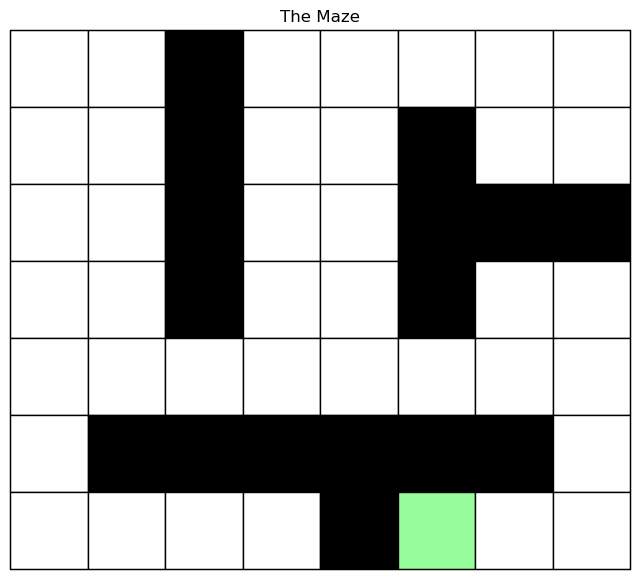

In [3]:
mz.draw_maze(maze)

In [4]:
# Create an environment maze
reload(mz)
env = mz.Maze(maze)

In [ ]:
# Finite horizon
max = 20
for horizon in range(max+1):
    print("HORIZON:"+str(horizon))
    V, policy= mz.dynamic_programming(env,horizon)

In [5]:
# Finite horizon
horizon = 20
# Solve the MDP problem with dynamic programming 
V, policy = mz.dynamic_programming(env,horizon)
print(policy)

[[2. 2. 2. ... 2. 2. 0.]
 [4. 4. 4. ... 4. 4. 4.]
 [4. 4. 4. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 3. 3.]
 [1. 1. 1. ... 1. 1. 0.]]


In [6]:
# Simulate the shortest path starting from position A
method = 'DynProg'
start  = ((0,0),(6,5))
death_count = 0
win_count = 0
other_count = 0
mean_time = 0
iter = 10000
for i in range(iter):
    path = env.simulate(start, policy, method)
    for t in range(len(path)):
        if path[t][0] == path[t][1]:
            death_count += 1
            break
        elif path[t][0] == (6,5):
            win_count += 1
            mean_time += t
            break
        elif t == len(path)-1:
            other_count += 1
            break

mean_time = mean_time/win_count
print("Death perc: " + str(death_count*(100/iter)) + "%")
print("Win perc: " + str(win_count*(100/iter)) + "%")
print("Other perc: " + str(other_count*(100/iter)) + "%")
print("Mean time: " + str(mean_time) + " steps")

Death perc: 27.96%
Win perc: 72.04%
Other perc: 0.0%
Mean time: 15.0 steps


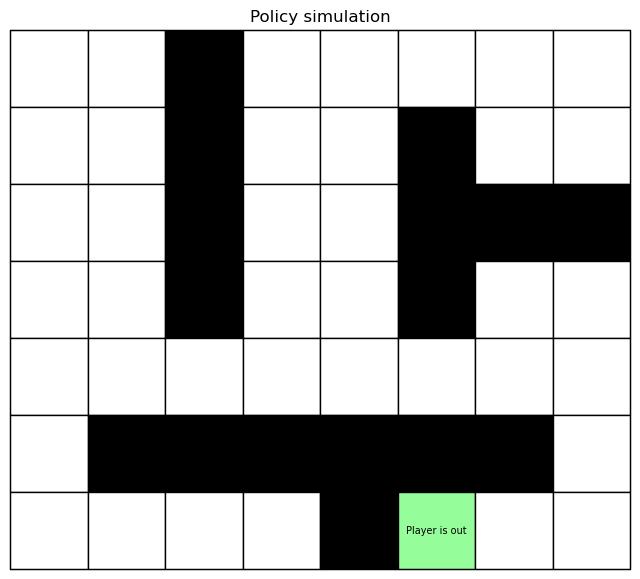

In [70]:
# Show the shortest path 
mz.animate_solution(maze, path)

### Point B: Value Iteration

In [15]:
# Create an environment maze
reload(mz)
env = mz.Maze(maze)

In [16]:
# Discount Factor 
p = 1/30
# Accuracy threshold
epsilon = 0.0001
V, policy = mz.value_iteration(env, p, epsilon)

0.0


In [18]:
# Simulate the shortest path starting from position A
method = 'ValIter'
start  = ((0,0),(6,5))
death_count = 0
win_count = 0
other_count = 0
mean_time = 0
iter = 10000
for i in range(iter):
    path = env.simulate(start, policy, method)
    #print(path)
    for t in range(len(path)):
        if path[t][0] == path[t][1]:
            death_count += 1
            break
        elif path[t][0] == (6,5):
            win_count += 1
            mean_time += t
            break
        elif t == len(path)-1:
            other_count += 1
            break

# mean_time = mean_time/win_count
print("Death perc: " + str(death_count*(100/iter)) + "%")
print("Win perc: " + str(win_count*(100/iter)) + "%")
print("Other perc: " + str(other_count*(100/iter)) + "%")
# print("Mean time: " + str(mean_time) + " steps")

58
1
9
9
23
47
3
3
23
81
145
1
19
25
31
41
51
48
15
16
25
9
19
25
63
6
19
22
3
53
2
41
5
19
31
32
10
30
37
24
28
57
28
8
41
18
9
73
1
4
30
1
23
15
6
38
4
18
11
14
65
24
31
7
53
19
44
10
78
72
46
9
19
78
74
3
14
24
3
16
9
30
14
25
6
75
49
19
43
45
70
1
35
15
15
35
5
16
82
19
16
38
28
2
2
57
6
17
17
1
5
5
3
5
19
40
24
7
194
15
69
6
23
21
10
6
8
13
45
10
25
163
124
44
6
27
3
61
10
9
7
14
79
35
1
16
17
28
10
50
13
49
40
136
1
26
83
5
25
14
24
102
51
1
34
15
48
23
9
32
28
29
17
16
4
9
28
31
10
1
85
7
1
2
59
22
94
42
8
17
19
1
35
11
2
23
36
45
58
23
29
12
2
6
20
11
19
80
71
106
13
31
8
1
26
35
72
45
25
6
29
4
3
19
53
87
57
4
31
10
3
47
24
36
59
50
1
72
8
13
2
26
97
22
82
21
26
3
87
9
8
10
7
12
1
43
16
43
33
75
10
17
82
24
39
5
15
17
41
97
26
52
11
25
23
3
14
134
84
17
55
7
17
47
118
127
5
69
3
27
8
48
56
1
32
10
11
57
6
30
11
11
23
19
6
137
28
24
1
13
10
24
4
4
16
18
5
14
46
33
13
30
38
50
2
11
5
62
33
10
2
79
22
7
6
1
32
12
14
47
34
8
15
24
30
44
41
72
40
4
11
9
39
3
5
91
32
7
17
18
22
65
3

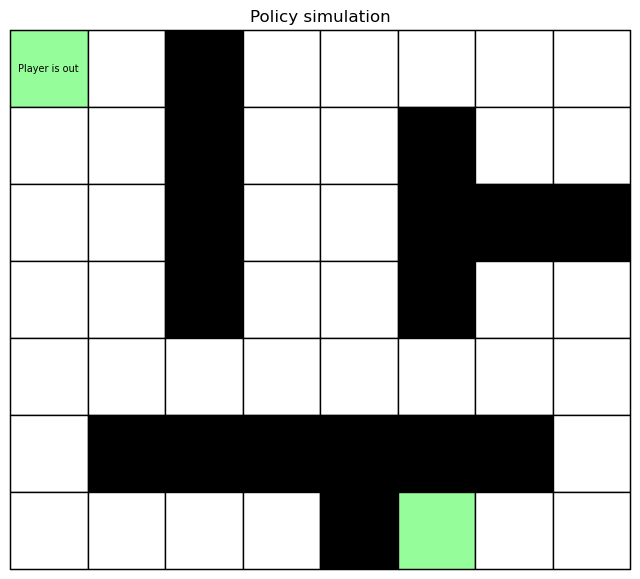

In [20]:
# Show the shortest path 
mz.animate_solution(maze, path)